## Exploratory Data Analysis

In [11]:
# Fix the numpy and pandas version issue
!pip uninstall -y numpy pandas

In [12]:
!pip install numpy==1.23.5 pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 72.3 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-ml 0.6.1 requires enum34, which is not installed.
keras-hub 0.20.0 requires keras>=3.5, which is not installed.
autokeras 2.0.0 requires keras>=3.0.0, which is not installed.
scikit-image 0.25.0 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.0 requires pillow>=10.1, but you have pillow 9.2.0 which is incompatible.
scikit-image 0.25.0 requires scipy>=1.11.2, but you have scipy 1.11.0 which is incompatible.
responsibleai 0.36.0 requires networkx<=2.5, but you have networkx 3.4 which is incompatible.
dask-sql 2024.5.0 requires dask[dataframe]>=2024.4.1, but you have dask 2023.2.0 which is i

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load the datasets from Azure ML datastore
farmer_advisor_df = pd.read_csv('farmer_advisor_dataset.csv')
market_researcher_df = pd.read_csv('market_researcher_dataset.csv')

# Display basic information about the datasets
print("Farmer Advisor Dataset Shape:", farmer_advisor_df.shape)
farmer_advisor_df.info()
print("\nMarket Researcher Dataset Shape:", market_researcher_df.shape)
market_researcher_df.info()

Farmer Advisor Dataset Shape: (10000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Farm_ID               10000 non-null  int64  
 1   Soil_pH               10000 non-null  float64
 2   Soil_Moisture         10000 non-null  float64
 3   Temperature_C         10000 non-null  float64
 4   Rainfall_mm           10000 non-null  float64
 5   Crop_Type             10000 non-null  object 
 6   Fertilizer_Usage_kg   10000 non-null  float64
 7   Pesticide_Usage_kg    10000 non-null  float64
 8   Crop_Yield_ton        10000 non-null  float64
 9   Sustainability_Score  10000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 781.4+ KB

Market Researcher Dataset Shape: (10000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         

## Farmer Advisor Dataset Analysis

In [14]:
# Summary statistics for the farmer advisor dataset
print(farmer_advisor_df.describe())

# Check for missing values
print("Missing values in farmer advisor dataset:")
print(farmer_advisor_df.isnull().sum())

# Examine the distribution of crop types
print("Crop type distribution:")
print(farmer_advisor_df['Crop_Type'].value_counts())

           Farm_ID       Soil_pH  Soil_Moisture  Temperature_C   Rainfall_mm  \
count  10000.00000  10000.000000   10000.000000   10000.000000  10000.000000   
mean    5000.50000      6.499494      29.988655      25.027475    174.969854   
std     2886.89568      0.574181      11.493376       5.769509     72.860989   
min        1.00000      5.500021      10.002907      15.000186     50.031967   
25%     2500.75000      6.003992      20.027802      20.078612    111.786631   
50%     5000.50000      6.495380      29.862527      24.955117    174.468002   
75%     7500.25000      6.993481      40.052369      30.053313    237.812507   
max    10000.00000      7.499762      49.994713      34.999673    299.986192   

       Fertilizer_Usage_kg  Pesticide_Usage_kg  Crop_Yield_ton  \
count         10000.000000        10000.000000    10000.000000   
mean            125.212701           10.521074        5.489634   
std              43.132645            5.535558        2.608809   
min            

## Market Researcher Dataset Analysis

In [15]:
# Summary statistics for the market researcher dataset
print(market_researcher_df.describe())

# Check for missing values
print("Missing values in market researcher dataset:")
print(market_researcher_df.isnull().sum())

# Examine the distribution of products and seasonal factors
print("Product distribution:")
print(market_researcher_df['Product'].value_counts())
print("\nSeasonal factor distribution:")
print(market_researcher_df['Seasonal_Factor'].value_counts())

         Market_ID  Market_Price_per_ton  Demand_Index  Supply_Index  \
count  10000.00000          10000.000000  10000.000000  10000.000000   
mean    5000.50000            299.645429    125.093568    125.050815   
std     2886.89568            115.827248     43.294001     43.067888   
min        1.00000            100.037672     50.025587     50.024338   
25%     2500.75000            198.417882     87.542376     87.979919   
50%     5000.50000            300.389982    124.281852    124.655779   
75%     7500.25000            399.950988    162.295042    161.747421   
max    10000.00000            499.999056    199.997449    199.991317   

       Competitor_Price_per_ton  Economic_Indicator  Weather_Impact_Score  \
count              10000.000000        10000.000000          10000.000000   
mean                 300.811000            1.003514             50.429491   
std                  115.529938            0.291315             29.086479   
min                  100.056917            

## Data Visualization

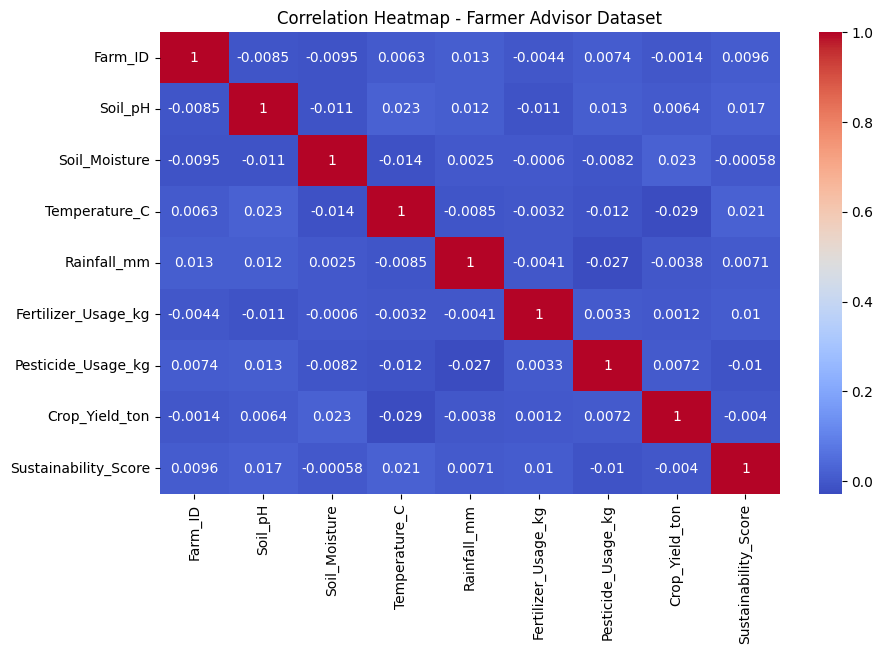

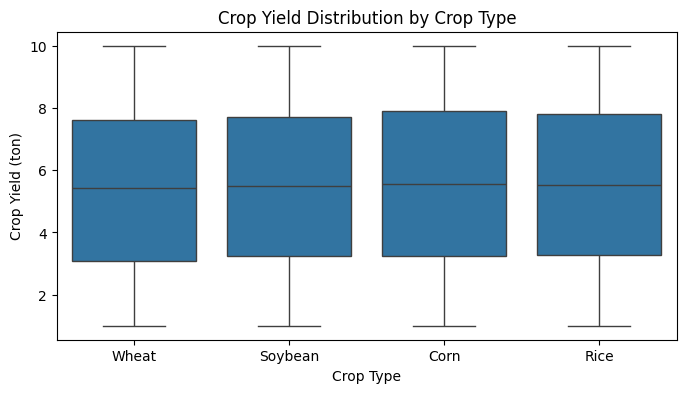

In [16]:
# Create a correlation heatmap for the farmer advisor dataset
# Select only numeric columns for correlation
numeric_df = farmer_advisor_df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Farmer Advisor Dataset')
plt.show()

# Visualize crop yield distribution by crop type
plt.figure(figsize=(8, 4))
sns.boxplot(x='Crop_Type', y='Crop_Yield_ton', data=farmer_advisor_df)
plt.title('Crop Yield Distribution by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Crop Yield (ton)')
plt.show()

## Data Preprocessing and Feature Engineering

### Data Cleaning

In [17]:
# Check for missing values and outliers
def check_data_quality(df, name):
    print(f"=== Data Quality Check for {name} ===")
    print(f"Missing values:\n{df.isnull().sum()}")
   
    # Check for potential outliers using IQR method
    numeric_cols = df.select_dtypes(include=np.number).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        print(f"\nPotential outliers in {col}:")
        print(f"Values < {Q1 - 1.5 * IQR}: {(df[col] < Q1 - 1.5 * IQR).sum()}")
        print(f"Values > {Q3 + 1.5 * IQR}: {(df[col] > Q3 + 1.5 * IQR).sum()}")

check_data_quality(farmer_advisor_df, "Farmer Advisor Dataset")
check_data_quality(market_researcher_df, "Market Researcher Dataset")

=== Data Quality Check for Farmer Advisor Dataset ===
Missing values:
Farm_ID                 0
Soil_pH                 0
Soil_Moisture           0
Temperature_C           0
Rainfall_mm             0
Crop_Type               0
Fertilizer_Usage_kg     0
Pesticide_Usage_kg      0
Crop_Yield_ton          0
Sustainability_Score    0
dtype: int64

Potential outliers in Farm_ID:
Values < -4998.5: 0
Values > 14999.5: 0

Potential outliers in Soil_pH:
Values < 4.519758843041321: 0
Values > 8.477714368154079: 0

Potential outliers in Soil_Moisture:
Values < -10.0090486529627: 0
Values > 70.08922006195839: 0

Potential outliers in Temperature_C:
Values < 5.116560825297087: 0
Values > 45.01536495090501: 0

Potential outliers in Rainfall_mm:
Values < -77.2521823823115: 0
Values > 426.85132104819616: 0

Potential outliers in Fertilizer_Usage_kg:
Values < -24.065035398213993: 0
Values > 274.63005781170625: 0

Potential outliers in Pesticide_Usage_kg:
Values < -8.806928045606895: 0
Values > 29.8133701

### Handling Categorical Variables

In [20]:
# Function to encode categorical variables
def encode_categorical_features(df):
    df_encoded = df.copy()
    categorical_columns = df.select_dtypes(include=['object']).columns
   
    label_encoders = {}
    for column in categorical_columns:
        le = LabelEncoder()
        df_encoded[column + '_encoded'] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le
   
    return df_encoded, label_encoders

# Apply encoding to both datasets
farmer_advisor_df_encoded, farmer_encoders = encode_categorical_features(farmer_advisor_df)
market_researcher_df_encoded, market_encoders = encode_categorical_features(market_researcher_df)

### Feature Scaling

In [21]:
# Define function for feature scaling
def scale_features(df, target_columns):
    df_copy = df.copy()
   
    # Separate features and targets
    features = df_copy.drop(columns=target_columns, errors='ignore') # Added errors='ignore'
    targets = df_copy[target_columns]
   
    # Select only numerical columns for scaling (excluding encoded categorical columns)
    numerical_cols = features.select_dtypes(include=np.number).columns
    original_cols = features.columns
   
    # Scale numerical features
    scaler = StandardScaler()
    features_scaled = features.copy()
    features_scaled[numerical_cols] = scaler.fit_transform(features[numerical_cols])
   
    # Return scaled features, targets, and the scaler for later use
    return features_scaled, targets, scaler

# Scale features for farmer advisor dataset
farmer_features, farmer_targets, farmer_scaler = scale_features(
    farmer_advisor_df_encoded,
    ['Crop_Yield_ton', 'Sustainability_Score']
)

# Scale features for market researcher dataset
market_features, market_targets, market_scaler = scale_features(
    market_researcher_df_encoded,
    ['Market_Price_per_ton']
)

### Feature Engineering

In [22]:
# Feature engineering for farmer advisor dataset
def engineer_farm_features(df):
    df_new = df.copy()
   
    # Create water availability index (combination of rainfall and soil moisture)
    df_new['WaterAvailabilityIndex'] = df_new['Rainfall_mm'] * df_new['Soil_Moisture'] / 100
   
    # Create fertilizer efficiency (yield per kg of fertilizer)
    df_new['FertilizerEfficiency'] = df_new['Crop_Yield_ton'] / df_new['Fertilizer_Usage_kg']
   
    # Create pesticide efficiency (yield per kg of pesticide)
    df_new['PesticideEfficiency'] = df_new['Crop_Yield_ton'] / df_new['Pesticide_Usage_kg']
   
    return df_new

# Feature engineering for market researcher dataset
def engineer_market_features(df):
    df_new = df.copy()
   
    # Create supply-demand ratio
    df_new['SupplyDemandRatio'] = df_new['Supply_Index'] / df_new['Demand_Index']
   
    # Create price differential (difference between market price and competitor price)
    df_new['PriceDifferential'] = df_new['Market_Price_per_ton'] - df_new['Competitor_Price_per_ton']
   
    # Create weather-adjusted economic indicator
    df_new['WeatherAdjustedEconomic'] = df_new['Economic_Indicator'] * (1 - df_new['Weather_Impact_Score']/100)
   
    return df_new

# Apply feature engineering
farmer_advisor_df_engineered = engineer_farm_features(farmer_advisor_df)
market_researcher_df_engineered = engineer_market_features(market_researcher_df)

## Model Training

### Creating Azure ML Experiments

In [23]:
from azureml.core import Workspace
ws = Workspace.from_config()

In [3]:
from azureml.core import Workspace, Experiment, ScriptRunConfig
from azureml.core.compute import ComputeTarget
from azureml.core.compute_target import ComputeTargetException
from azureml.core import Environment
from azureml.core import Dataset

# Connect to Azure ML workspace
ws = Workspace.from_config()

# Get the compute target for training
try:
    compute_target = ComputeTarget(workspace=ws, name="cpu-cluster")
except ComputeTargetException:
    print("Creating a new compute target...")
    # Define the configuration for the compute target
    from azureml.core.compute import AmlCompute
    compute_config = AmlCompute.provisioning_configuration(
        vm_size="STANDARD_DS2_V2",  # Or another appropriate VM size
        max_nodes=4,  # Adjust as needed
    )
    # Create the compute target
    compute_target = ComputeTarget.create(ws, "cpu-cluster", compute_config)
    compute_target.wait_for_completion(show_output=True)

# Define experiments
crop_yield_experiment = Experiment(workspace=ws, name="crop-yield-prediction")
sustainability_experiment = Experiment(workspace=ws, name="sustainability-prediction")
market_price_experiment = Experiment(workspace=ws, name="market-price-prediction")

### Training Models Using Code-First Approach

/anaconda/envs/jupyter_env/bin/python -m pip install azureml-dataset-runtime --upgrade

Run the above code in the terminal first

In [7]:
from azureml.core import Environment
from azureml.core.conda_dependencies import CondaDependencies

# Create a new Azure ML environment
sklearn_env = Environment(name="sklearn-env")
sklearn_env.python.user_managed_dependencies = False  # Let AzureML manage dependencies
sklearn_env.python.conda_dependencies = CondaDependencies.create(
    conda_packages=['scikit-learn', 'pandas', 'numpy'],
    pip_packages=['azureml-defaults']
)

In [17]:
# Define training script for crop yield prediction
crop_yield_script = ScriptRunConfig(
    source_directory='.',
    script='train_crop_yield.py',
    compute_target=compute_target,
    environment=sklearn_env,
    arguments=[
        '--data-path', 'farmer_advisor_dataset.csv',
        '--target-column', 'CropYieldton',
        '--model-name', 'crop_yield_model'
    ]
)

# Submit the experiment
crop_yield_run = crop_yield_experiment.submit(crop_yield_script)
crop_yield_run.wait_for_completion(show_output=True)

Submitting /mnt/batch/tasks/shared/LS_root/mounts/clusters/lds7005m/code/Users/chamini.whustudies/LDSProject directory for run. The size of the directory >= 25 MB, so it can take a few minutes.


RunId: crop-yield-prediction_1747046462_373f1d5a
Web View: https://ml.azure.com/runs/crop-yield-prediction_1747046462_373f1d5a?wsid=/subscriptions/fdb9903a-f44b-40e9-93a9-a16f8fb0f3b5/resourcegroups/chamini.whustudies-rg/workspaces/lds7005m&tid=6da93285-f112-4125-a19d-e53015f9b3ab

Streaming azureml-logs/20_image_build_log.txt

======Starting Image Build on Serverless Compute======
The run ID for the image build on serverless compute is imgbldrun_34ca9d3
Additional logs for the run: https://ml.azure.com/experiments/id/prepare_image/runs/imgbldrun_34ca9d3?wsid=/subscriptions/fdb9903a-f44b-40e9-93a9-a16f8fb0f3b5/resourcegroups/chamini.whustudies-rg/workspaces/LDS7005M&tid=6da93285-f112-4125-a19d-e53015f9b3ab
2025-05-12T10:41:37: Logging into Docker registry: 918c9b54e2ac4c4f957109b4aabac3dd.azurecr.io
2025-05-12T10:41:37: WARNING! Using --password via the CLI is insecure. Use --password-stdin.

2025-05-12T10:41:37: Login Succeeded
2025-05-12T10:41:37: WARNING! Your credentials are stored

### Using AutoML for Model Training

In [ ]:
from azureml.train.automl import AutoMLConfig
from azureml.train.automl.run import AutoMLRun

# Define AutoML configuration for market price prediction
automl_config = AutoMLConfig(
    task='regression',
    primary_metric='r2_score',
    training_data=market_dataset,
    label_column_name='MarketPriceperton',
    compute_target=compute_target,
    n_cross_validations=5,
    max_concurrent_iterations=4,
    experiment_timeout_minutes=60
)

# Submit AutoML experiment
automl_run = market_price_experiment.submit(automl_config)
automl_run.wait_for_completion(show_output=True)

# Get the best model
best_run, best_model = automl_run.get_output()


## Model Evaluation and Interpretation

### Evaluating Model Performance

In [ ]:
# Get runs from experiments
crop_yield_run = crop_yield_experiment.get_runs().next()
sustainability_run = sustainability_experiment.get_runs().next()
market_price_run = market_price_experiment.get_runs().next()

# Print evaluation metrics
print("Crop Yield Model Performance:")
print(f"RMSE: {crop_yield_run.get_metrics()['RMSE']:.2f}")
print(f"R2: {crop_yield_run.get_metrics()['R2']:.2f}")

print("\nSustainability Model Performance:")
print(f"RMSE: {sustainability_run.get_metrics()['RMSE']:.2f}")
print(f"R2: {sustainability_run.get_metrics()['R2']:.2f}")

print("\nMarket Price Model Performance:")
print(f"RMSE: {market_price_run.get_metrics()['RMSE']:.2f}")
print(f"R2: {market_price_run.get_metrics()['R2']:.2f}")

### Model Interpretation with Feature Importance

In [ ]:
# Get feature importance for crop yield model
crop_importance = pd.DataFrame(crop_yield_run.get_output("Feature Importance"))
crop_importance = crop_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(crop_importance['Feature'][:10], crop_importance['Importance'][:10])
plt.title('Top 10 Features for Crop Yield Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Cross-Validation Analysis

In [ ]:
from sklearn.model_selection import cross_val_score

# Load the trained models
crop_yield_model = joblib.load('crop_yield_model.pkl')
sustainability_model = joblib.load('sustainability_model.pkl')
market_price_model = joblib.load('market_price_model.pkl')

# Perform cross-validation
cv_scores_crop = cross_val_score(crop_yield_model, X_scaled, y, cv=5, scoring='neg_root_mean_squared_error')
cv_scores_sustainability = cross_val_score(sustainability_model, X_scaled, y, cv=5, scoring='neg_root_mean_squared_error')
cv_scores_market = cross_val_score(market_price_model, X_scaled, y, cv=5, scoring='neg_root_mean_squared_error')

# Print cross-validation results
print("Crop Yield CV RMSE: {:.2f} ± {:.2f}".format(-cv_scores_crop.mean(), cv_scores_crop.std()))
print("Sustainability CV RMSE: {:.2f} ± {:.2f}".format(-cv_scores_sustainability.mean(), cv_scores_sustainability.std()))
print("Market Price CV RMSE: {:.2f} ± {:.2f}".format(-cv_scores_market.mean(), cv_scores_market.std()))

## Model Deployment in Azure ML

### Registering Models in Azure ML

In [ ]:
from azureml.core.model import Model

# Register the crop yield model
crop_yield_model = Model.register(
    model_path="crop_yield_model.pkl",
    model_name="crop_yield_model",
    tags={"data_type": "tabular", "task": "regression"},
    description="Random Forest model to predict crop yield based on environmental factors",
    workspace=ws
)

# Register the scaler and label encoders as models
crop_yield_scaler = Model.register(
    model_path="scaler_crop_yield_model.pkl",
    model_name="crop_yield_scaler",
    tags={"type": "preprocessor"},
    description="StandardScaler for crop yield model",
    workspace=ws
)

crop_yield_encoders = Model.register(
    model_path="label_encoders_crop_yield_model.pkl",
    model_name="crop_yield_encoders",
    tags={"type": "preprocessor"},
    description="Label encoders for crop yield model",
    workspace=ws
)

### Creating Inference Configuration

In [ ]:
# Create a scoring script (score.py) for crop yield prediction
%%writefile score.py
import json
import numpy as np
import pandas as pd
import joblib
from azureml.core.model import Model

def init():
    global model, scaler, encoders
    
    # Load models from the registered model directory
    model_path = Model.get_model_path('crop_yield_model')
    scaler_path = Model.get_model_path('crop_yield_scaler')
    encoders_path = Model.get_model_path('crop_yield_encoders')
    
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    encoders = joblib.load(encoders_path)

def run(raw_data):
    try:
        # Parse input data
        data = json.loads(raw_data)
        data_df = pd.DataFrame(data['data'])
        
        # Encode categorical variables
        for column, encoder in encoders.items():
            if column in data_df.columns:
                data_df[column + 'Encoded'] = encoder.transform(data_df[column])
        
        # Select numerical features
        features = data_df.select_dtypes(include=np.number)
        
        # Scale features
        features_scaled = scaler.transform(features)
        
        # Make prediction
        result = model.predict(features_scaled)
        
        # Return the result
        return json.dumps({"prediction": result.tolist()})
    except Exception as e:
        return json.dumps({"error": str(e)})

define the environment for the deployment

In [ ]:
from azureml.core.environment import Environment
from azureml.core.conda_dependencies import CondaDependencies

# Create environment for deployment
env = Environment(name="crop-yield-prediction-env")
conda_dep = CondaDependencies()

# Add required packages
conda_dep.add_conda_package("scikit-learn")
conda_dep.add_conda_package("pandas")
conda_dep.add_conda_package("numpy")
env.python.conda_dependencies = conda_dep

# Create inference configuration
from azureml.core.model import InferenceConfig
inference_config = InferenceConfig(
    entry_script="score.py",
    environment=env
)

### Deploying as Web Service

In [ ]:
from azureml.core.webservice import AciWebservice

# Define deployment configuration
deployment_config = AciWebservice.deploy_configuration(
    cpu_cores=1,
    memory_gb=1,
    auth_enabled=True,
    enable_app_insights=True,
    description="Web service for crop yield prediction"
)

# Deploy the web service
service_name = "crop-yield-prediction"
service = Model.deploy(
    workspace=ws,
    name=service_name,
    models=[crop_yield_model, crop_yield_scaler, crop_yield_encoders],
    inference_config=inference_config,
    deployment_config=deployment_config
)

service.wait_for_deployment(show_output=True)

### Testing the Deployed Service

In [ ]:
import requests
import json

# Prepare test data
test_data = {
    "data": [
        {
            "SoilpH": 6.5,
            "SoilMoisture": 30.0,
            "TemperatureC": 25.0,
            "Rainfallmm": 175.0,
            "CropType": "Wheat",
            "FertilizerUsagekg": 125.0,
            "PesticideUsagekg": 10.5
        }
    ]
}

# Get the scoring URI and key
scoring_uri = service.scoring_uri
key = service.get_keys()[0]

# Make prediction request
headers = {
    'Content-Type': 'application/json',
    'Authorization': 'Bearer ' + key
}
response = requests.post(scoring_uri, json=test_data, headers=headers)

# Display the prediction result
print("Prediction result:")
print(json.loads(response.text))